In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("/content/gdrive/My Drive/cardio.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data['age']=data['age'].apply(lambda x : x//365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
data=data.drop(['id'], axis=1)

In [6]:
data["cardio"].unique()


array([0, 1])

In [7]:
data.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,52.840681,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.766685,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.shape

(69301, 12)

In [11]:
data.isnull()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,False,False,False,False,False,False,False,False,False,False,False,False
69297,False,False,False,False,False,False,False,False,False,False,False,False
69298,False,False,False,False,False,False,False,False,False,False,False,False
69299,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

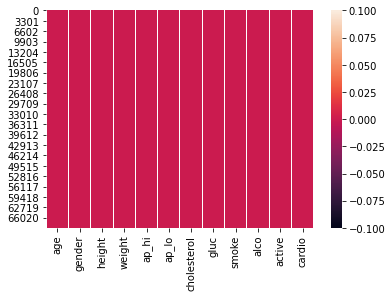

In [13]:
sns.heatmap(data.isnull())

In [14]:
## Step 1 Removing duplicates if any
data.duplicated().sum()

3164

In [15]:
data.corr()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023243,-0.081292,0.054310,0.020754,0.017703,0.153915,0.098769,-0.047680,-0.029450,-0.009987,0.237909
gender,-0.023243,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.081292,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,0.054310,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.020754,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,0.017703,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.153915,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.098769,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225
alco,-0.029450,0.171015,0.094164,0.067259,0.001385,0.010764,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217


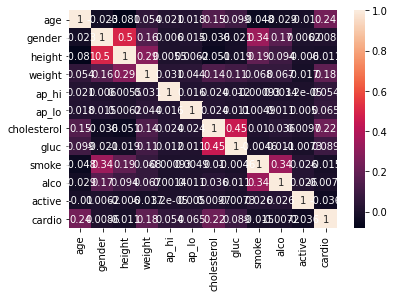

In [16]:
sns.heatmap(data.corr(), annot=True)

In [17]:
data.skew()

age            -0.306050
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

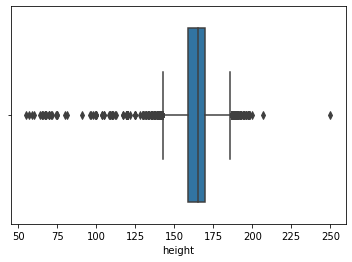

In [ ]:
sns.boxplot(data.height)

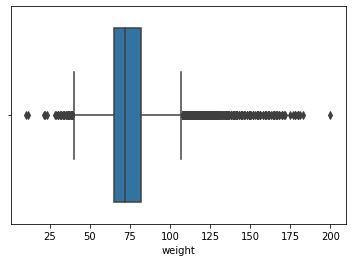

In [ ]:
sns.boxplot(data.weight)

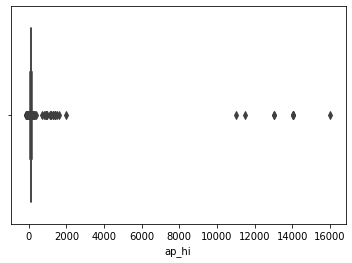

In [ ]:
sns.boxplot(data.ap_hi)

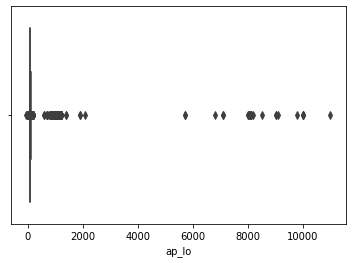

In [ ]:
sns.boxplot(data.ap_lo)

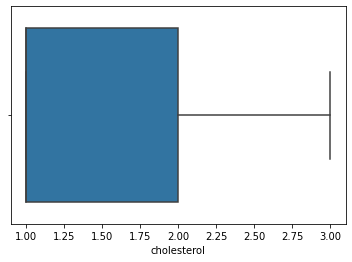

In [ ]:
sns.boxplot(data.cholesterol)

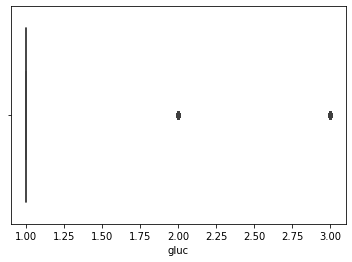

In [ ]:
sns.boxplot(data.gluc)

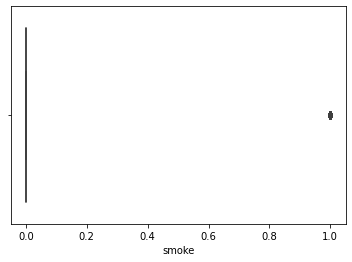

In [ ]:
sns.boxplot(data.smoke)

In [20]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[1.20581624, 0.73302344, 1.14099939, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.89764614, 0.73302344, 0.16601717, ..., 0.23864069, 0.49376463,
        1.00082284],
       [1.05803232, 0.73302344, 0.07772839, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [0.12423906, 1.36421285, 2.27143838, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.20581624, 0.73302344, 0.16601717, ..., 0.23864069, 2.02525646,
        1.00082284],
       [0.46689663, 0.73302344, 0.68709227, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [21]:
threshold=3
print(np.where(z>3))

(array([    3,     3,    13, ..., 69296, 69297, 69298]), array([8, 9, 7, ..., 8, 3, 9]))


In [22]:
Q1=data.quantile(0.25)
Q1

age             48.0
gender           1.0
height         159.0
weight          65.0
ap_hi          120.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0.25, dtype: float64

In [23]:
Q3=data.quantile(0.75)
Q3

age             58.0
gender           2.0
height         170.0
weight          82.0
ap_hi          140.0
ap_lo           90.0
cholesterol      2.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           1.0
Name: 0.75, dtype: float64

In [24]:
IQR=Q3-Q1
IQR

age            10.0
gender          1.0
height         11.0
weight         17.0
ap_hi          20.0
ap_lo          10.0
cholesterol     1.0
gluc            0.0
smoke           0.0
alco            0.0
active          0.0
cardio          1.0
dtype: float64

In [25]:
data_new=data[(z<3).all(axis=1)]
data_new.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0
5,57,1,164,61.0,100,70,1,1,0,0,1,0


In [26]:
print(data.shape)
print(data_new.shape)

(69301, 12)
(55140, 12)


In [27]:
data_new.skew()

age           -0.288225
gender         0.902729
height         0.098899
weight         0.574304
ap_hi         -0.252020
ap_lo          4.735143
cholesterol    2.018967
gluc           3.202861
smoke          0.000000
alco           0.000000
active        -1.498342
cardio         0.061184
dtype: float64

In [28]:
#SPLITTING INTO X & Y
x=data_new.drop("cardio",axis=1)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61,1,155,69.0,130,80,2,2,0,0,1
1,40,1,163,71.0,110,70,1,1,0,0,1
2,60,1,165,70.0,120,80,1,1,0,0,1
4,64,1,155,62.0,120,80,1,1,0,0,1
5,57,1,164,61.0,100,70,1,1,0,0,1


In [29]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=Scaler.fit_transform(x)
x

array([[ 1.21662981, -0.64578912, -1.17613827, ...,  0.        ,
         0.        ,  0.50034002],
       [-1.88248062, -0.64578912, -0.11840511, ...,  0.        ,
         0.        ,  0.50034002],
       [ 1.06905312, -0.64578912,  0.14602818, ...,  0.        ,
         0.        ,  0.50034002],
       ...,
       [ 0.62632306, -0.64578912,  0.14602818, ...,  0.        ,
         0.        ,  0.50034002],
       [ 1.21662981, -0.64578912, -0.11840511, ...,  0.        ,
         0.        , -1.99864084],
       [ 0.47874637, -0.64578912,  0.8071114 , ...,  0.        ,
         0.        ,  0.50034002]])

In [30]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.216630,-0.645789,-1.176138,-0.300981,0.245909,-0.098609,1.266570,3.489359,0.0,0.0,0.50034
1,-1.882481,-0.645789,-0.118405,-0.147224,-0.880429,-1.078339,-0.468423,-0.286586,0.0,0.0,0.50034
2,1.069053,-0.645789,0.146028,-0.224102,-0.317260,-0.098609,-0.468423,-0.286586,0.0,0.0,0.50034
3,1.659360,-0.645789,-1.176138,-0.839130,-0.317260,-0.098609,-0.468423,-0.286586,0.0,0.0,0.50034
4,0.626323,-0.645789,0.013812,-0.916008,-1.443598,-1.078339,-0.468423,-0.286586,0.0,0.0,0.50034


In [31]:
x.skew()

0    -0.288225
1     0.902729
2     0.098899
3     0.574304
4    -0.252020
5     4.735143
6     2.018967
7     3.202861
8     0.000000
9     0.000000
10   -1.498342
dtype: float64

In [32]:
y=data_new["cardio"]
y.head()

0    0
1    1
2    0
4    0
5    0
Name: cardio, dtype: int64

In [33]:
print(x.shape)
print(y.shape)

(55140, 11)
(55140,)


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=11)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43560, 11)
(11580, 11)
(43560,)
(11580,)


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

LR: 0.728375 (0.008012)
KNC: 0.696740 (0.008650)
CART: 0.634343 (0.008564)
NB: 0.701309 (0.009308)
XGB: 0.736777 (0.007671)
SVM: 0.736524 (0.008399)
rfc: 0.704086 (0.010991)
gbr: 0.736639 (0.007469)


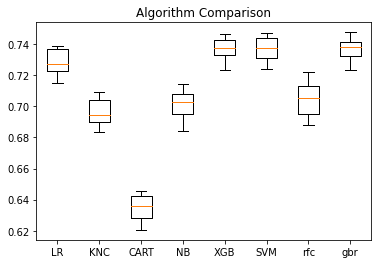

In [38]:
# Test Options and Evaluation Metrics
num_folds = 10
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('rfc', RandomForestClassifier(random_state=11)))
models.append(('gbr', GradientBoostingClassifier()))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=110)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)
    # Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [39]:
#pipeline with preprocessing and model
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
pipeline=make_pipeline(preprocessing.MinMaxScaler(),RandomForestClassifier(n_estimators=100))

In [40]:
#Appling Hyperparameters
pipeline.get_params()

{'memory': None,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'au

In [41]:

hyperparameters = { 'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestclassifier__max_depth': [None, 5, 3, 1]}

In [42]:
clf=GridSearchCV(pipeline,hyperparameters,cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
       

In [43]:
print(clf.best_params_)


{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'auto'}


In [44]:
print(clf.refit)


True


In [45]:

#pedicting the data
y_pred=clf.predict(x_test)

In [46]:
print(accuracy_score(y_test,y_pred))


0.7139896373056995
